# Performance benchmarks for LIF layers in Rockpool
This notebook runs and collects results for all benchmarks provided in `rockpool.utilities.benchmarks`.

In [6]:
import rockpool
import os
import datetime

print(f'Benchmarks run on rockpool version {rockpool.__version__}, on date {datetime.datetime.today()}.')
u = os.uname()
print(f'System descriptor: {u[0]} {u[2]} {u[4]}')

Benchmarks run on rockpool version 2.4.dev, on date 2022-11-11 09:33:04.578183.
System descriptor: Linux 5.10.136-1-MANJARO x86_64


Attempting to run benchmark LIF with no acceleration (numpy backend)...


100%|██████████| 10/10 [00:42<00:00,  4.23s/it]


Attempting to run benchmark LIFJax, no JIT...


  0%|          | 0/10 [00:00<?, ?it/s]2022-11-11 09:30:11.332462: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:127: UserWarning: Benchmarking for layer size 1 failed with error INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory.
  warnings.warn(f"Benchmarking for layer size {l_size} failed with error {str(e)}.")
 10%|█         | 1/10 [00:01<00:17,  2.00s/it]2022-11-11 09:30:11.340866: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
/home/dylan/rockpool/rockpool/utilities/benchmarking/benchma

Attempting to run benchmark LIFJax, with CPU JIT compilation...


  0%|          | 0/10 [00:00<?, ?it/s]2022-11-11 09:30:11.419190: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
2022-11-11 09:30:11.426516: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
2022-11-11 09:30:11.431916: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
2022-11-11 09:30:11.436402: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed:

Attempting to run benchmark LIFJax, with GPU JIT compilation...


  0%|          | 0/10 [00:00<?, ?it/s]2022-11-11 09:30:11.503761: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
2022-11-11 09:30:11.512128: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
2022-11-11 09:30:11.519194: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
2022-11-11 09:30:11.526847: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed:

Attempting to run benchmark LIFJax, with TPU JIT compilation...


  0%|          | 0/10 [00:00<?, ?it/s]2022-11-11 09:30:11.594690: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
2022-11-11 09:30:11.599724: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
2022-11-11 09:30:11.606854: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed: jaxlib/gpu/prng_kernels.cc:33: operation gpuGetLastError() failed: out of memory
2022-11-11 09:30:11.614044: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2153] Execution of replica 0 failed: INTERNAL: CustomCall failed:

Attempting to run benchmark LIFTorch on CPU...


100%|██████████| 10/10 [00:43<00:00,  4.35s/it]


Attempting to run benchmark LIFTorch on a CUDA device...


  0%|          | 0/10 [00:00<?, ?it/s]/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:127: UserWarning: Benchmarking for layer size 1 failed with error CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1..
  warnings.warn(f"Benchmarking for layer size {l_size} failed with error {str(e)}.")
/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:127: UserWarning: Benchmarking for layer size 2 failed with error CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1..
  warnings.warn(f"Benchmarking for layer size {l_size} failed with error {str(e)}.")
/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:127: UserWarning: Benchmarking for layer s

Attempting to run benchmark LIFTorch using CUDA graph replay acceleration...


  0%|          | 0/10 [00:00<?, ?it/s]/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:127: UserWarning: Benchmarking for layer size 1 failed with error CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 10.91 GiB total capacity; 0 bytes already allocated; 5.31 MiB free; 0 bytes reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF.
  warnings.warn(f"Benchmarking for layer size {l_size} failed with error {str(e)}.")
/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:127: UserWarning: Benchmarking for layer size 2 failed with error CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 10.91 GiB total capacity; 0 bytes already allocated; 5.31 MiB free; 0 bytes reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentatio

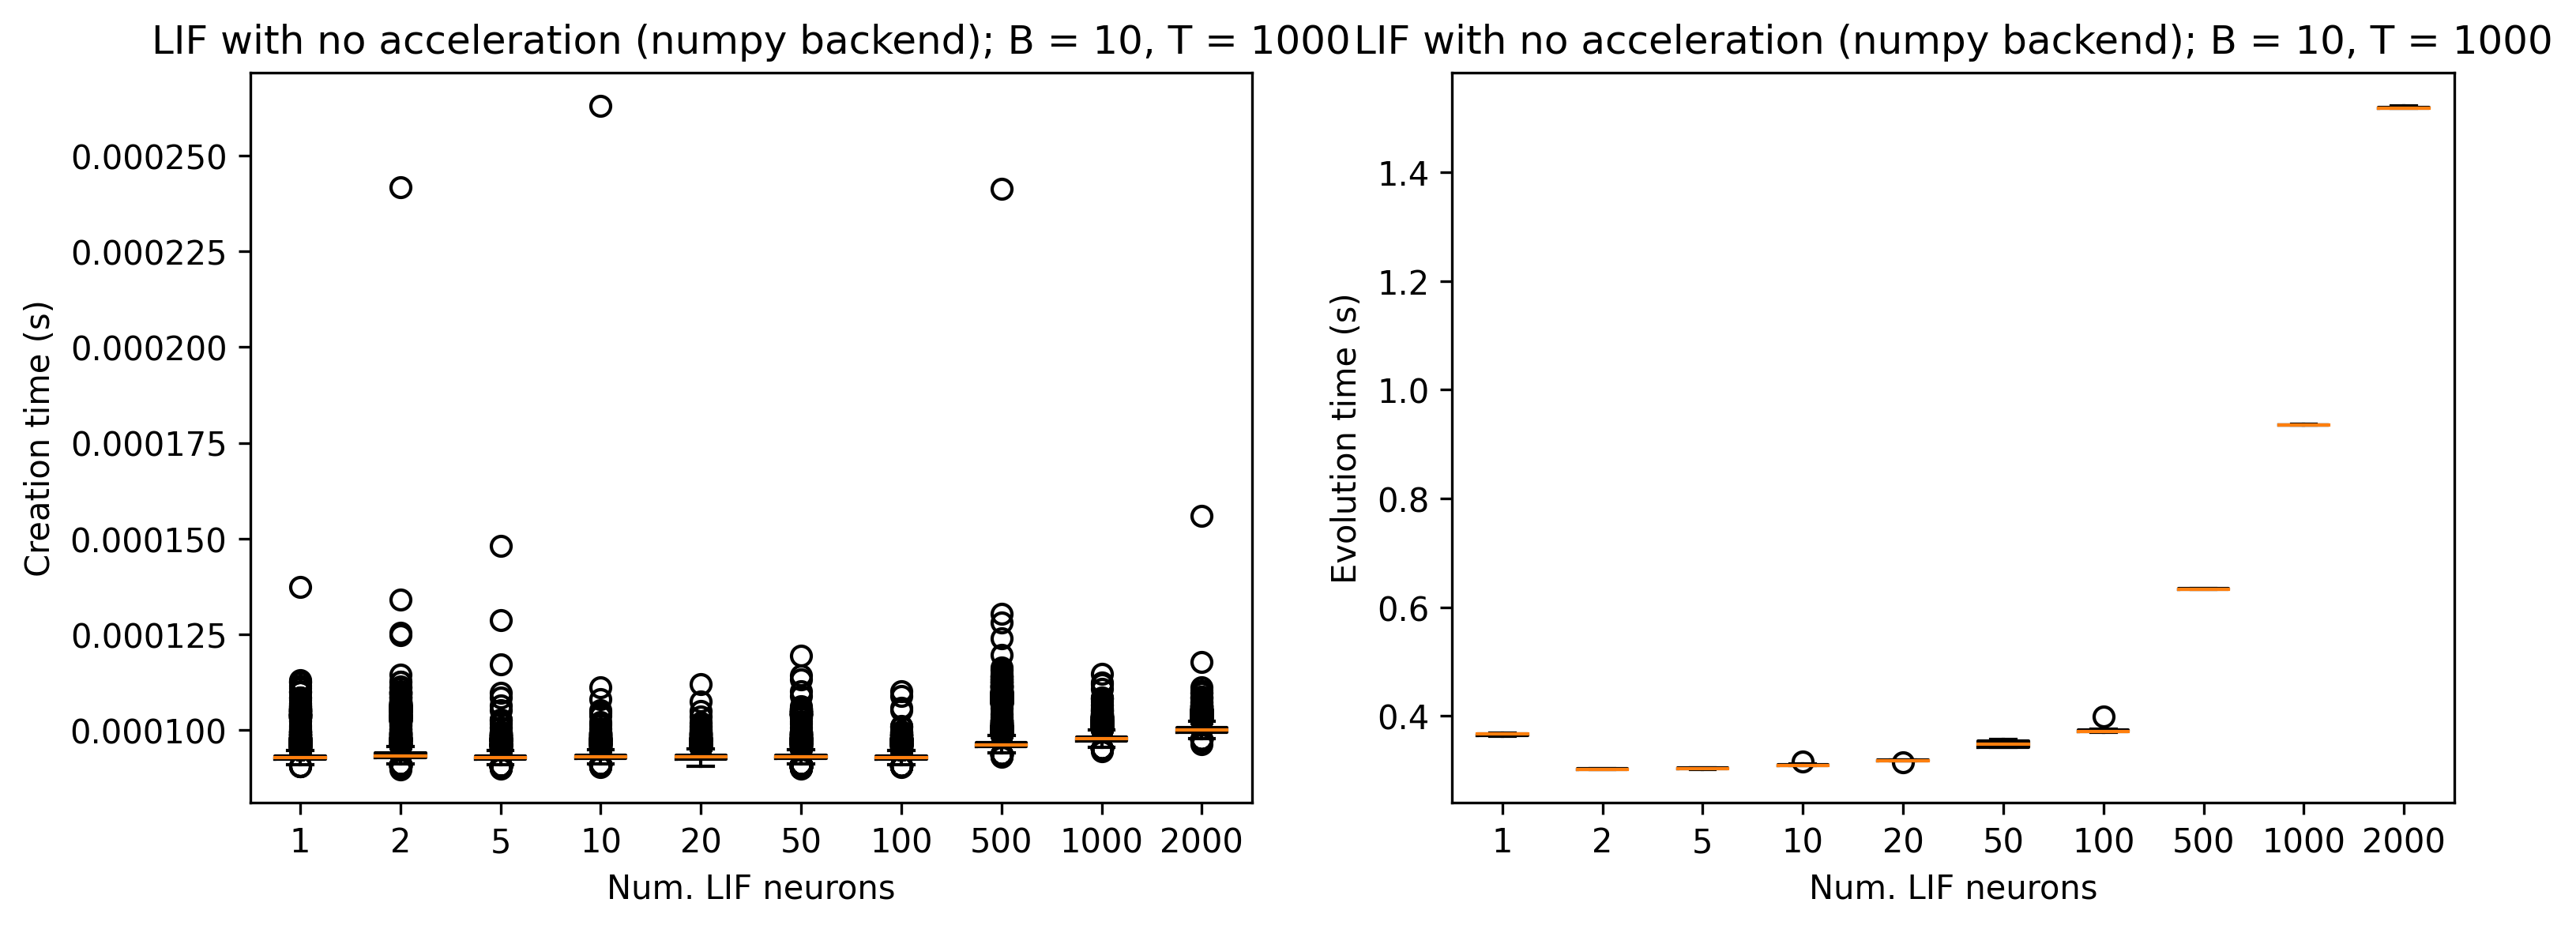

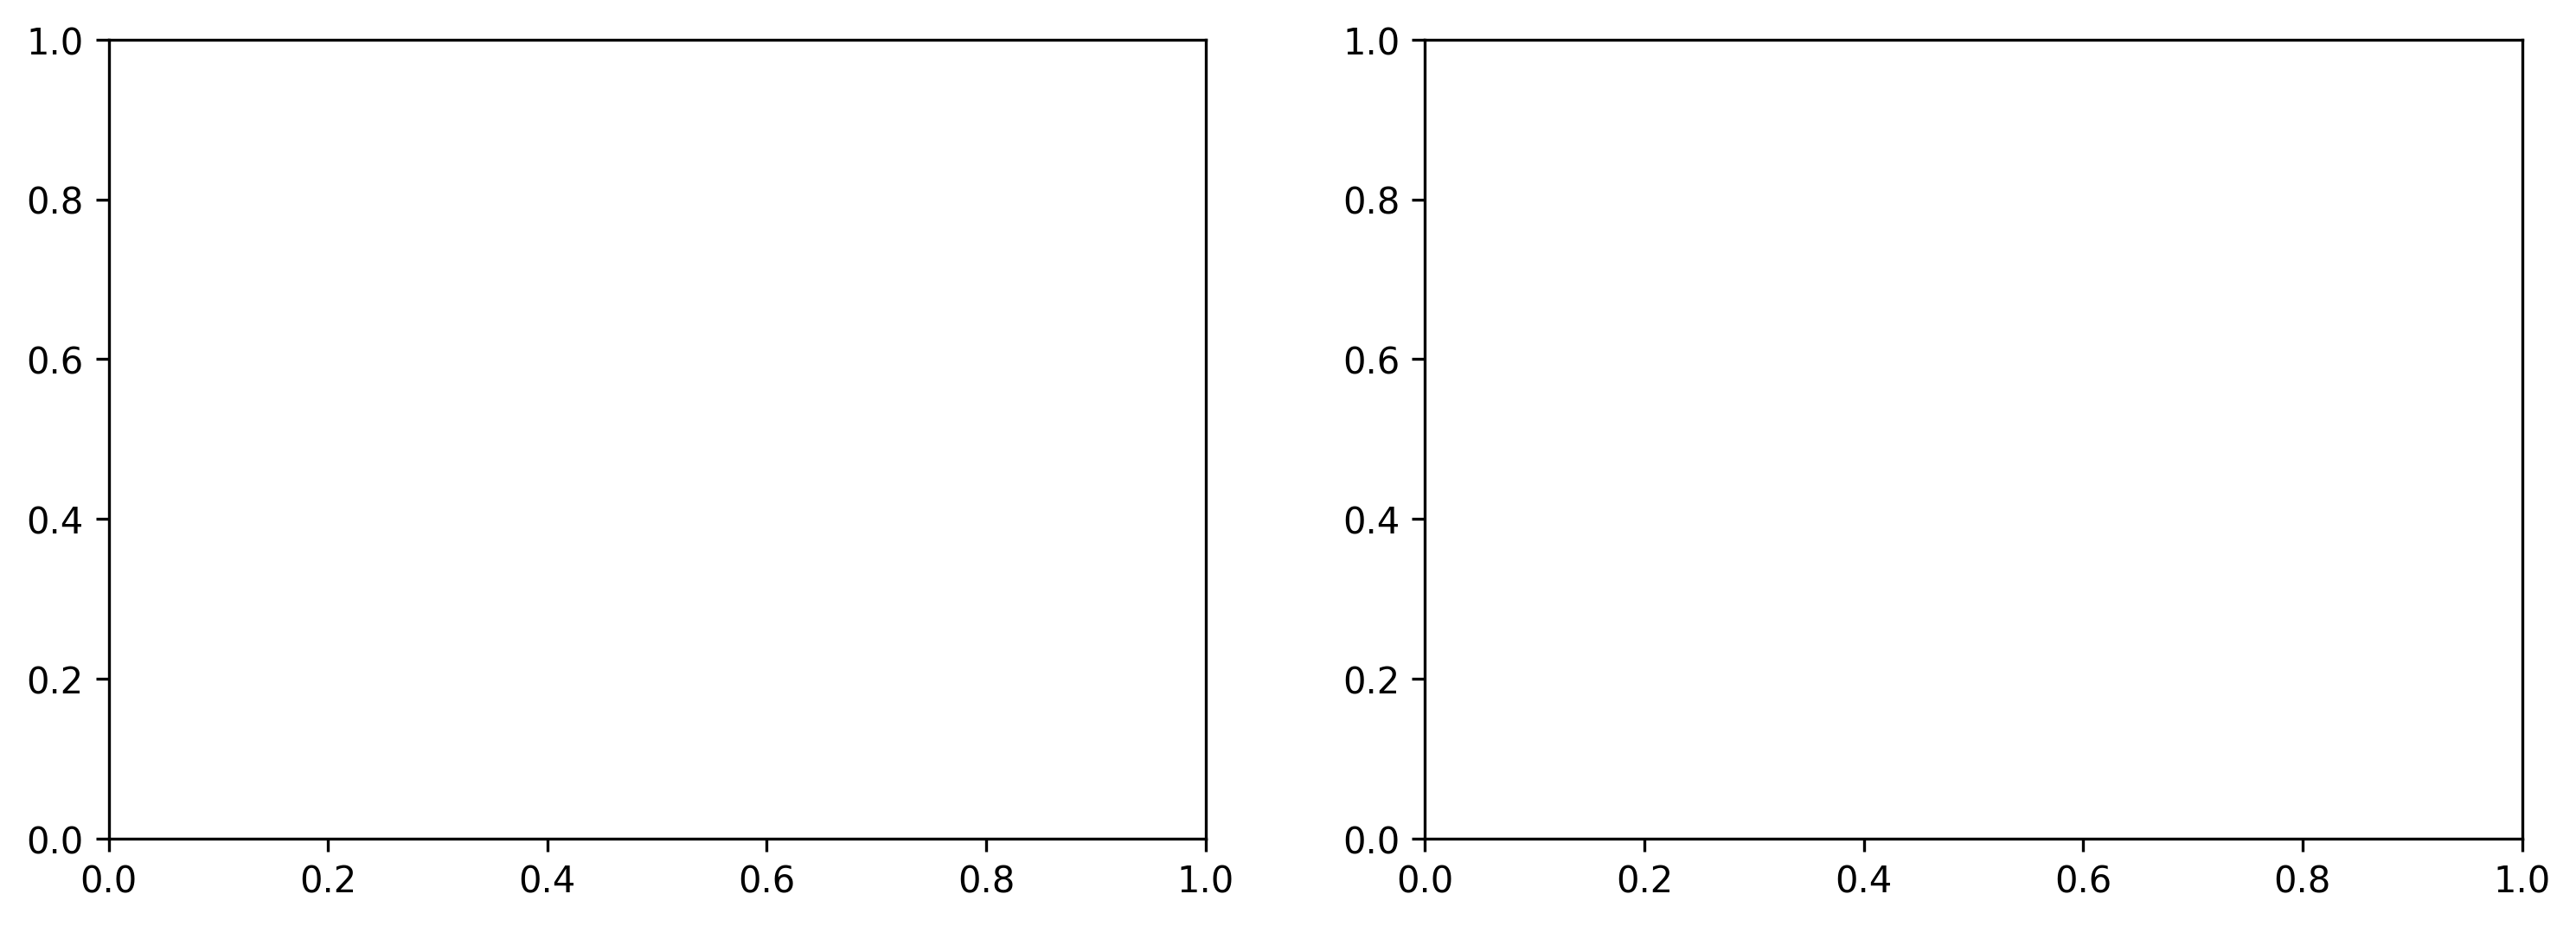

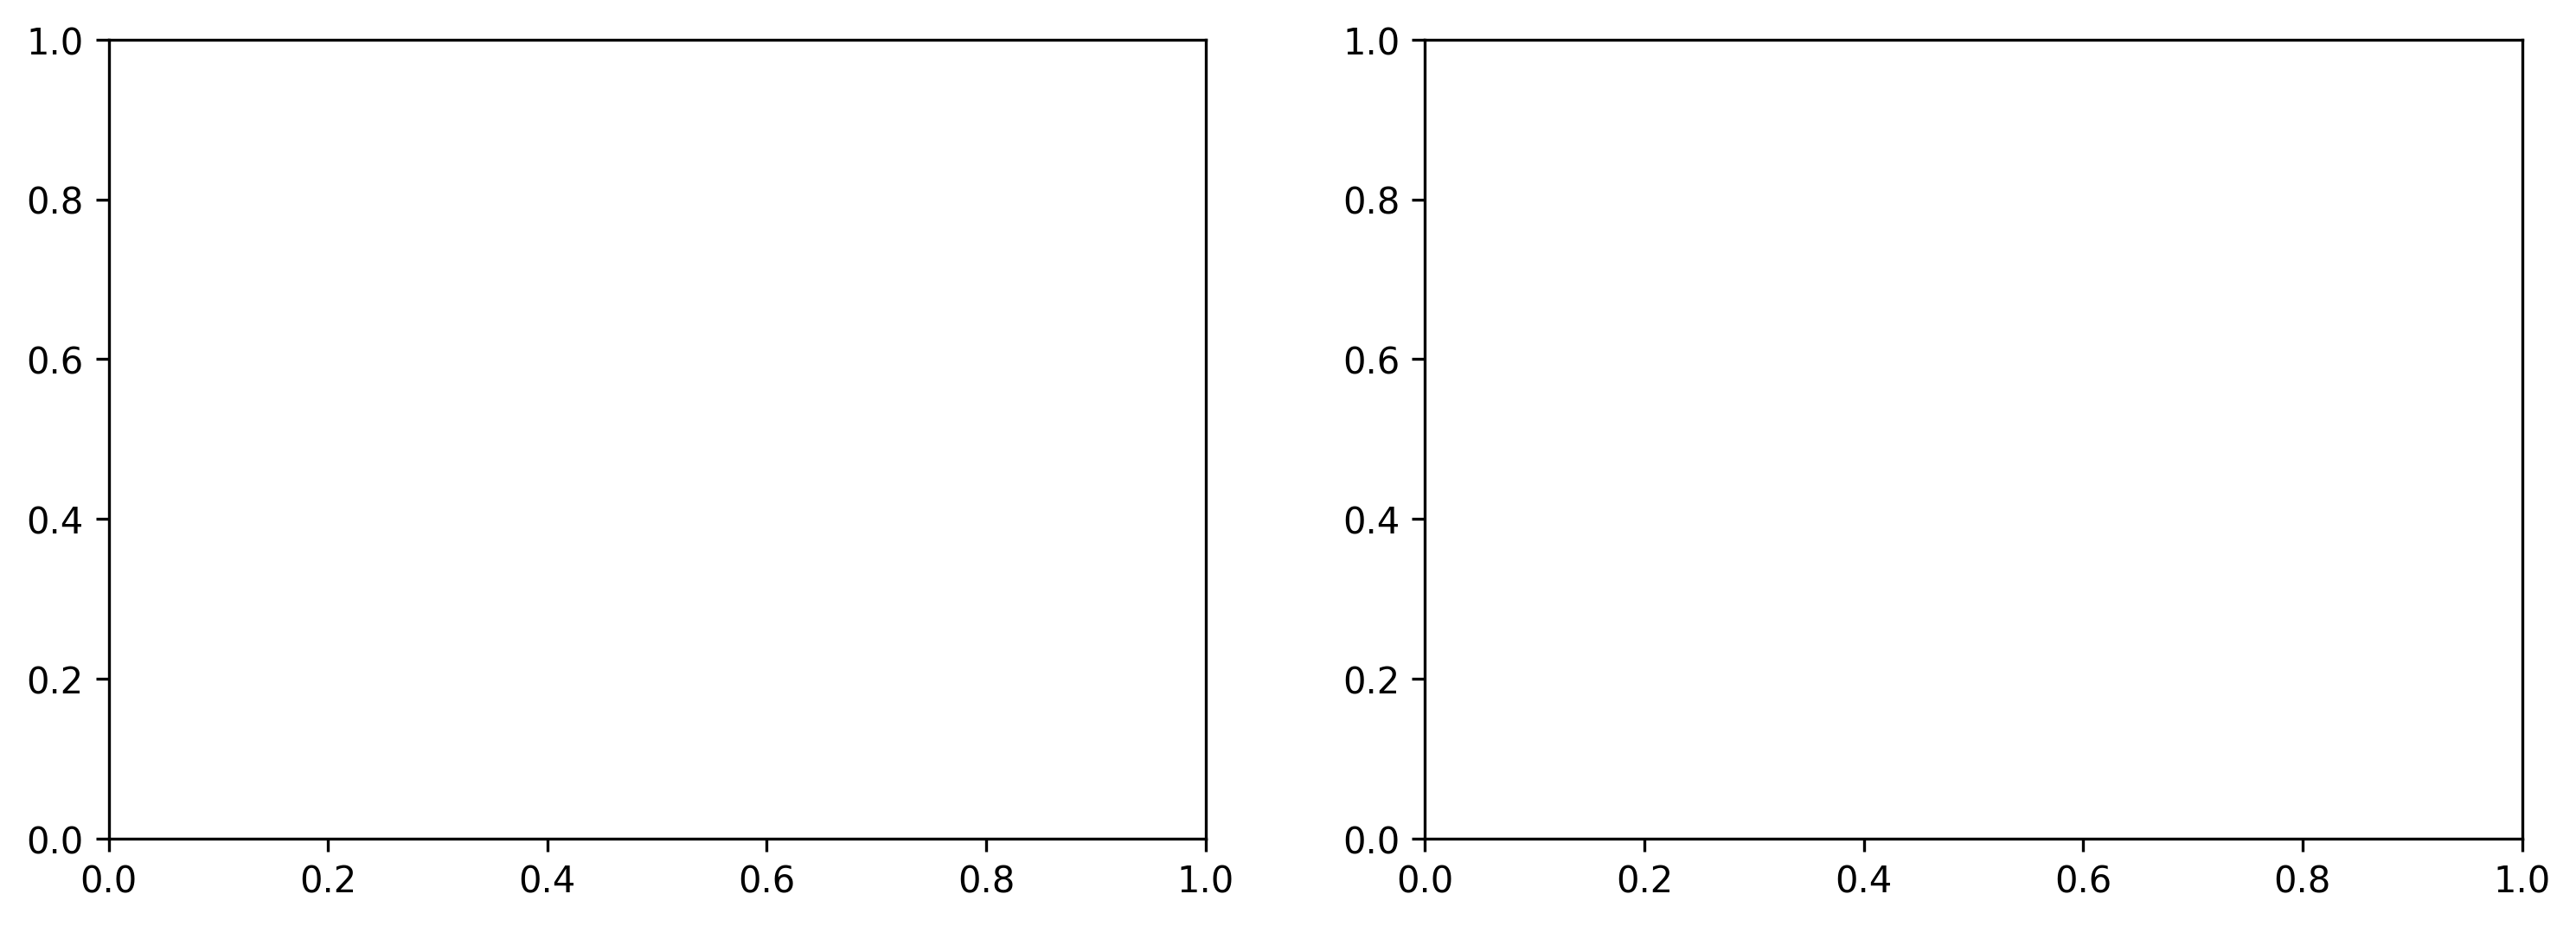

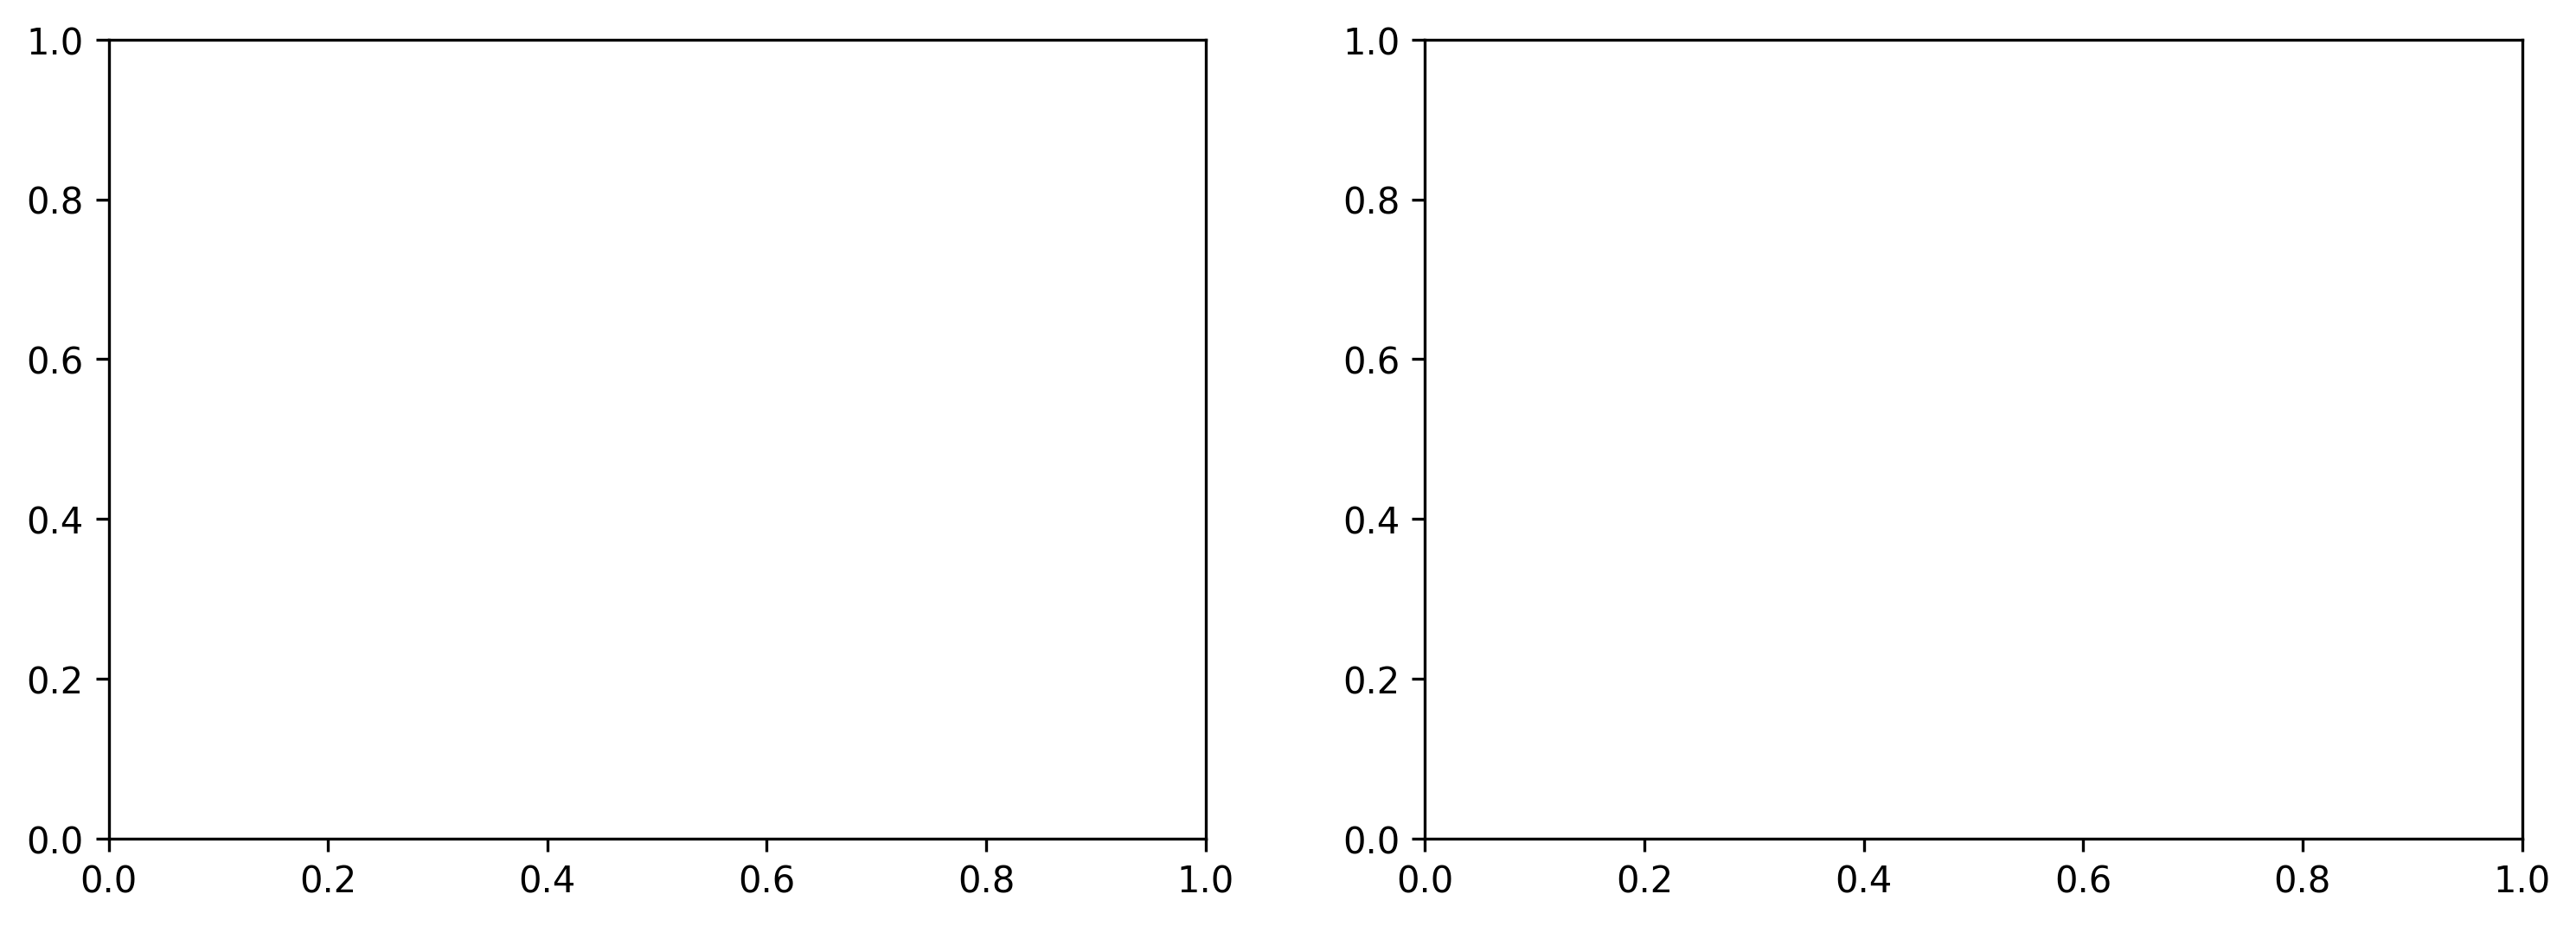

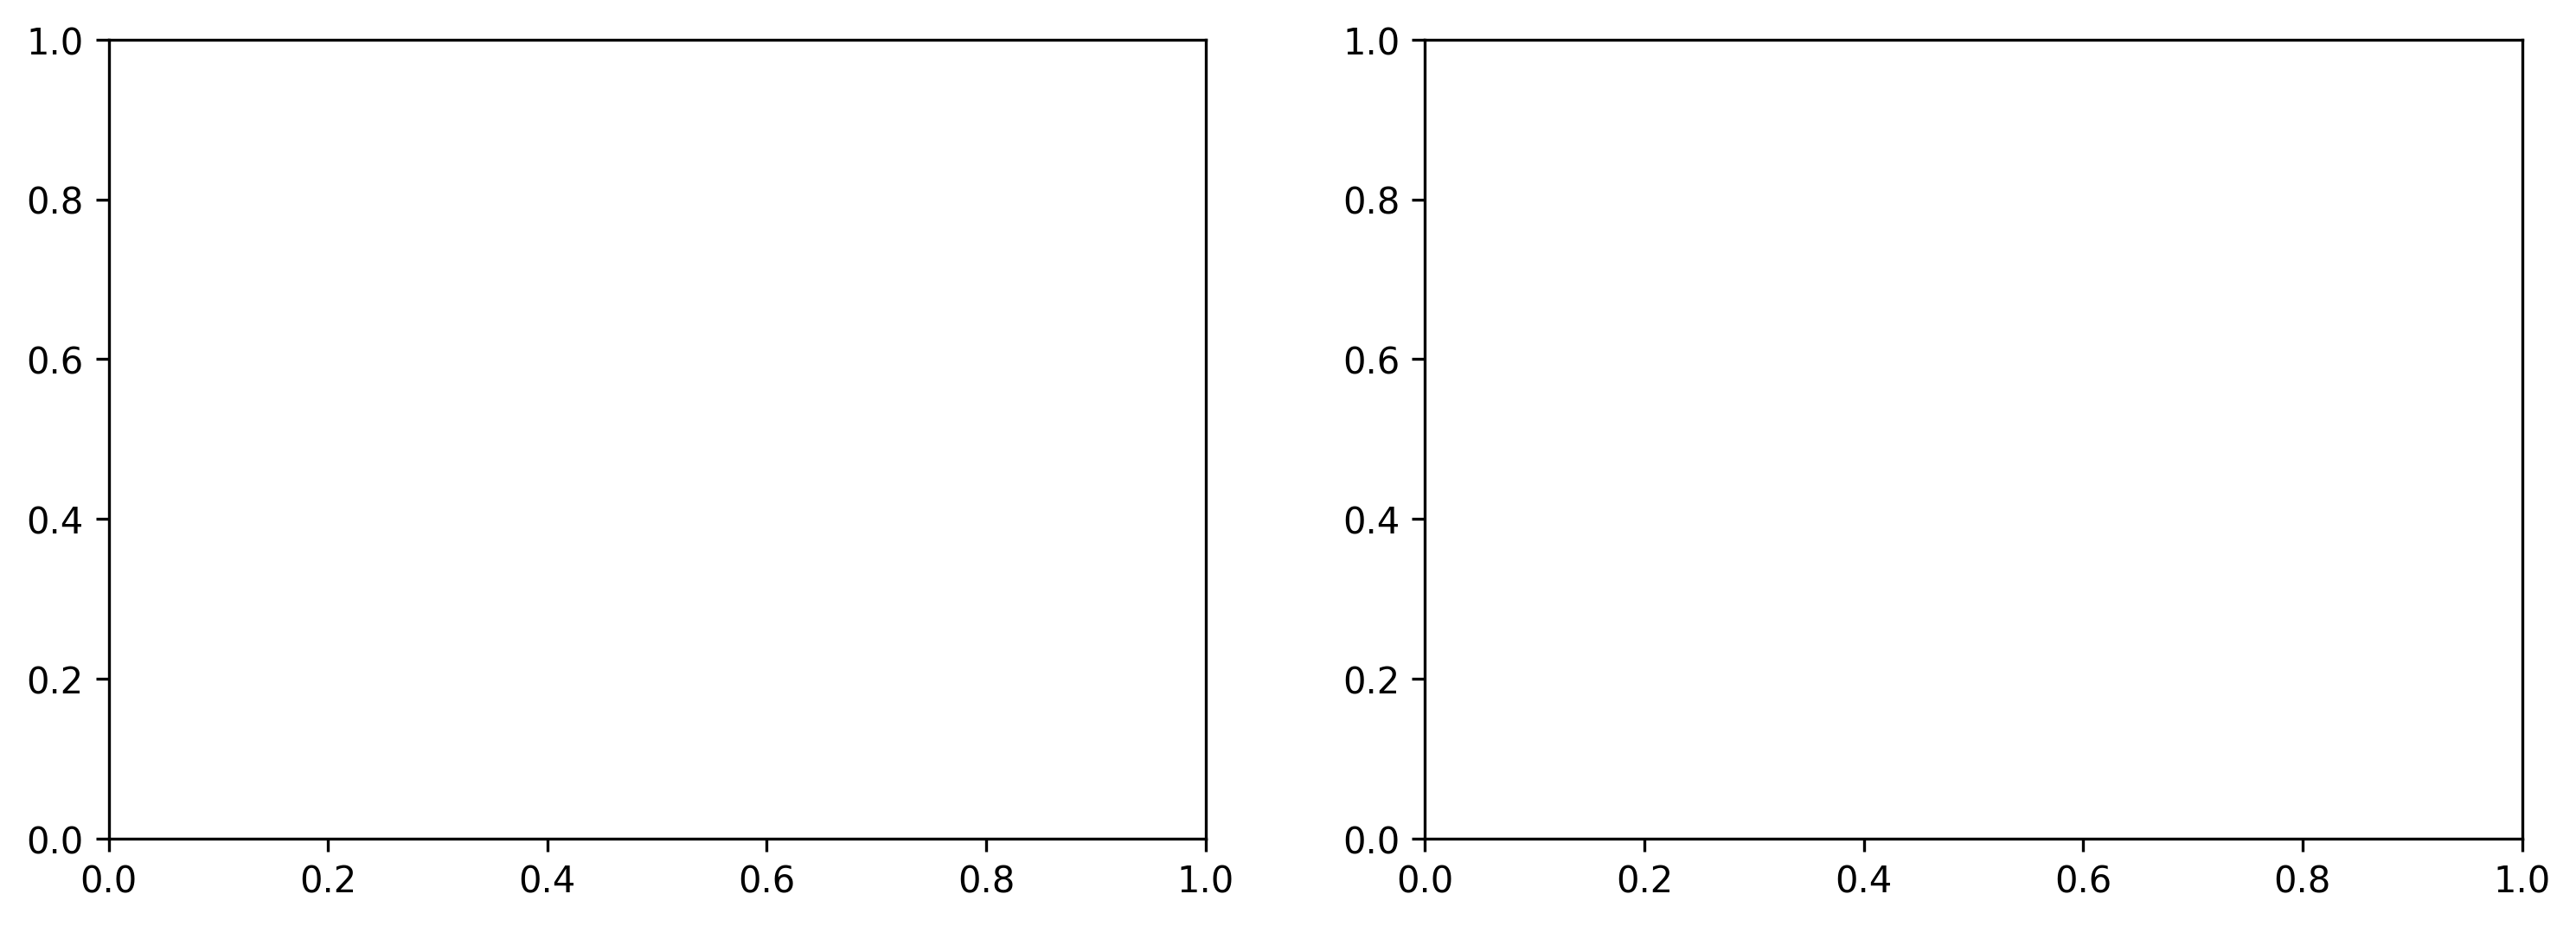

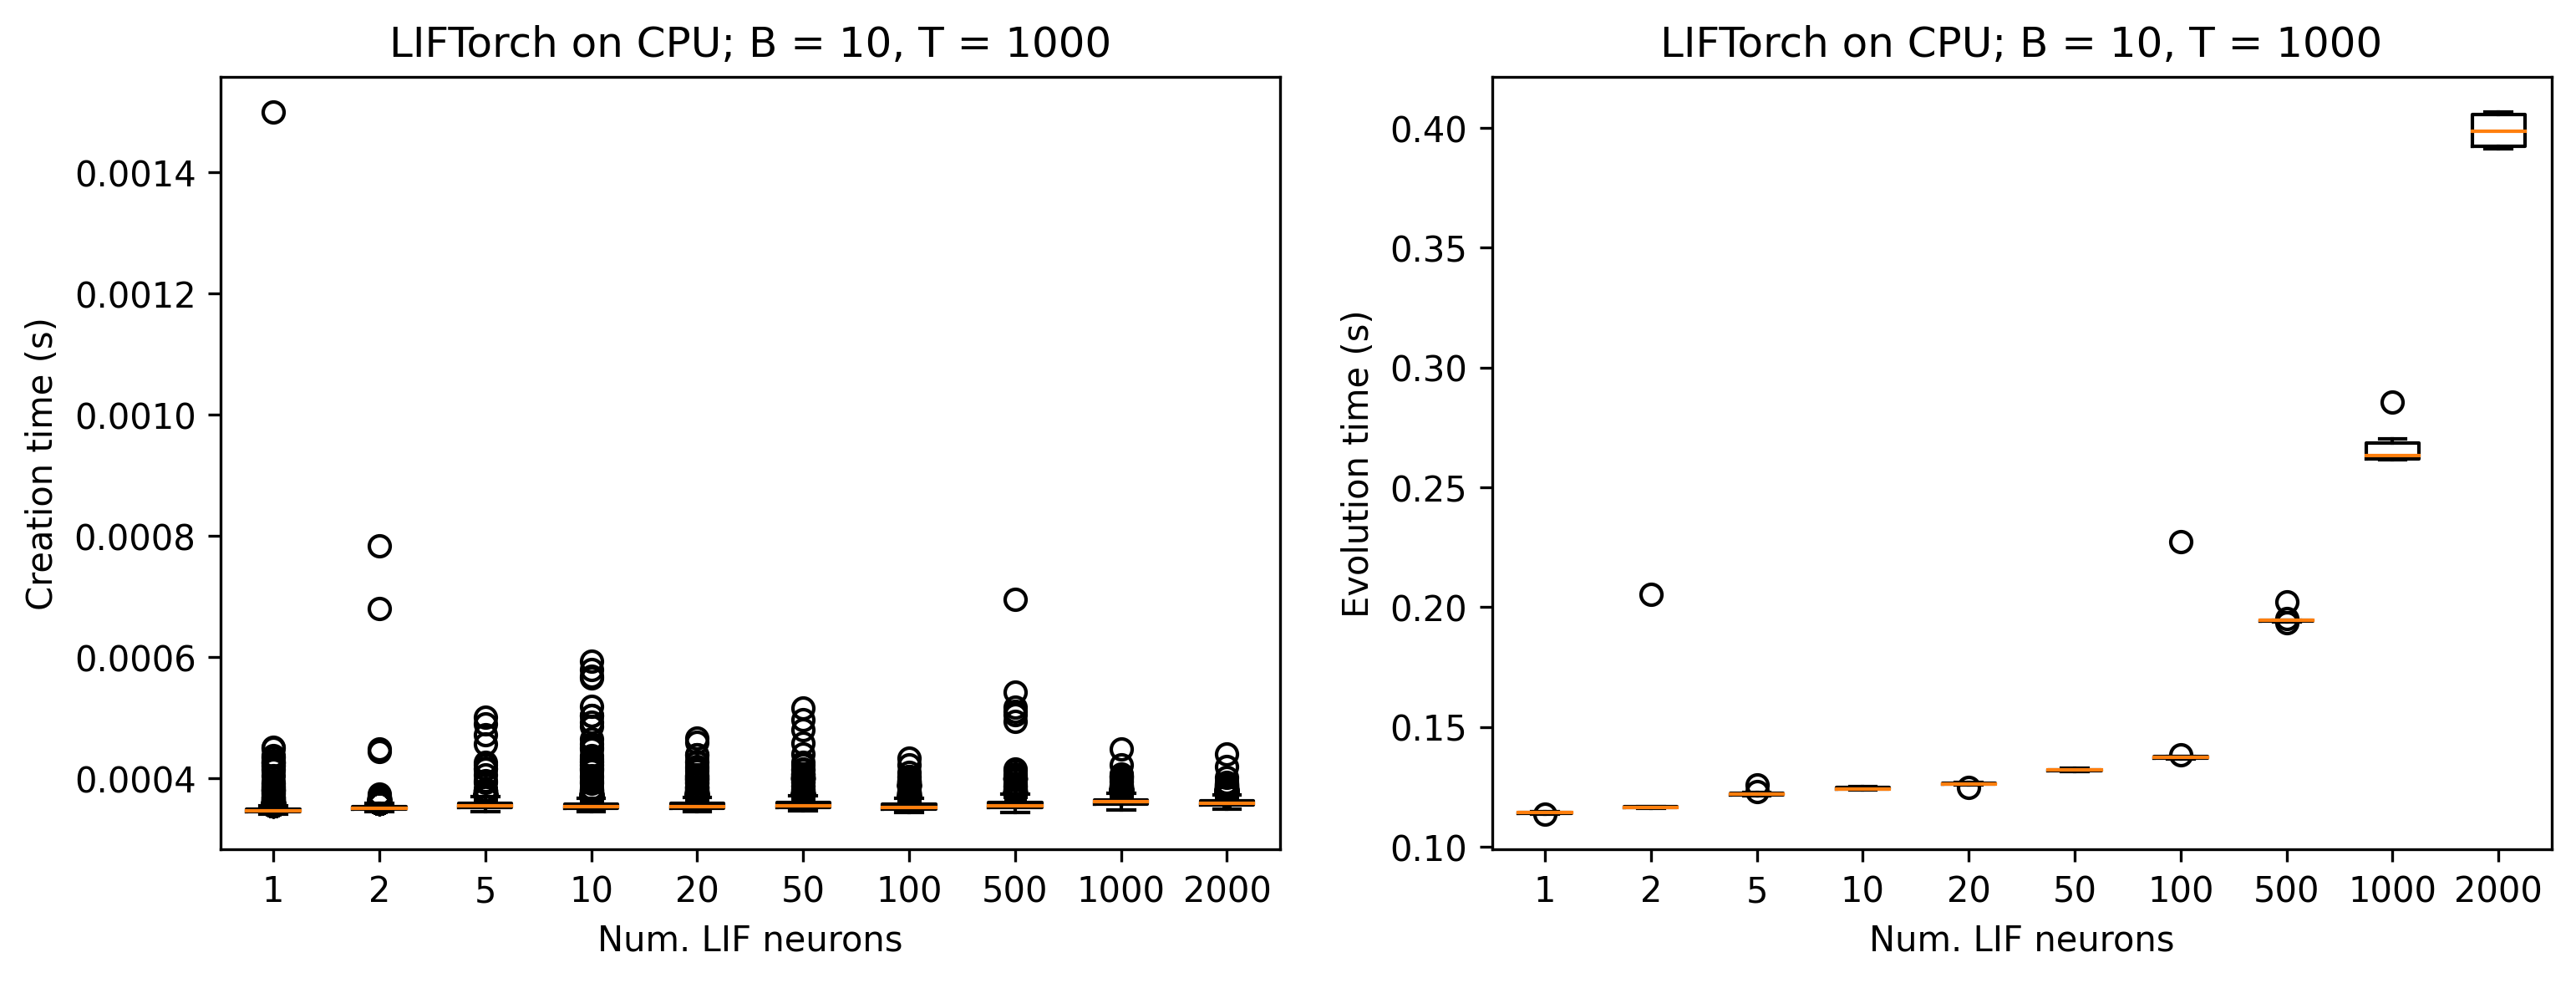

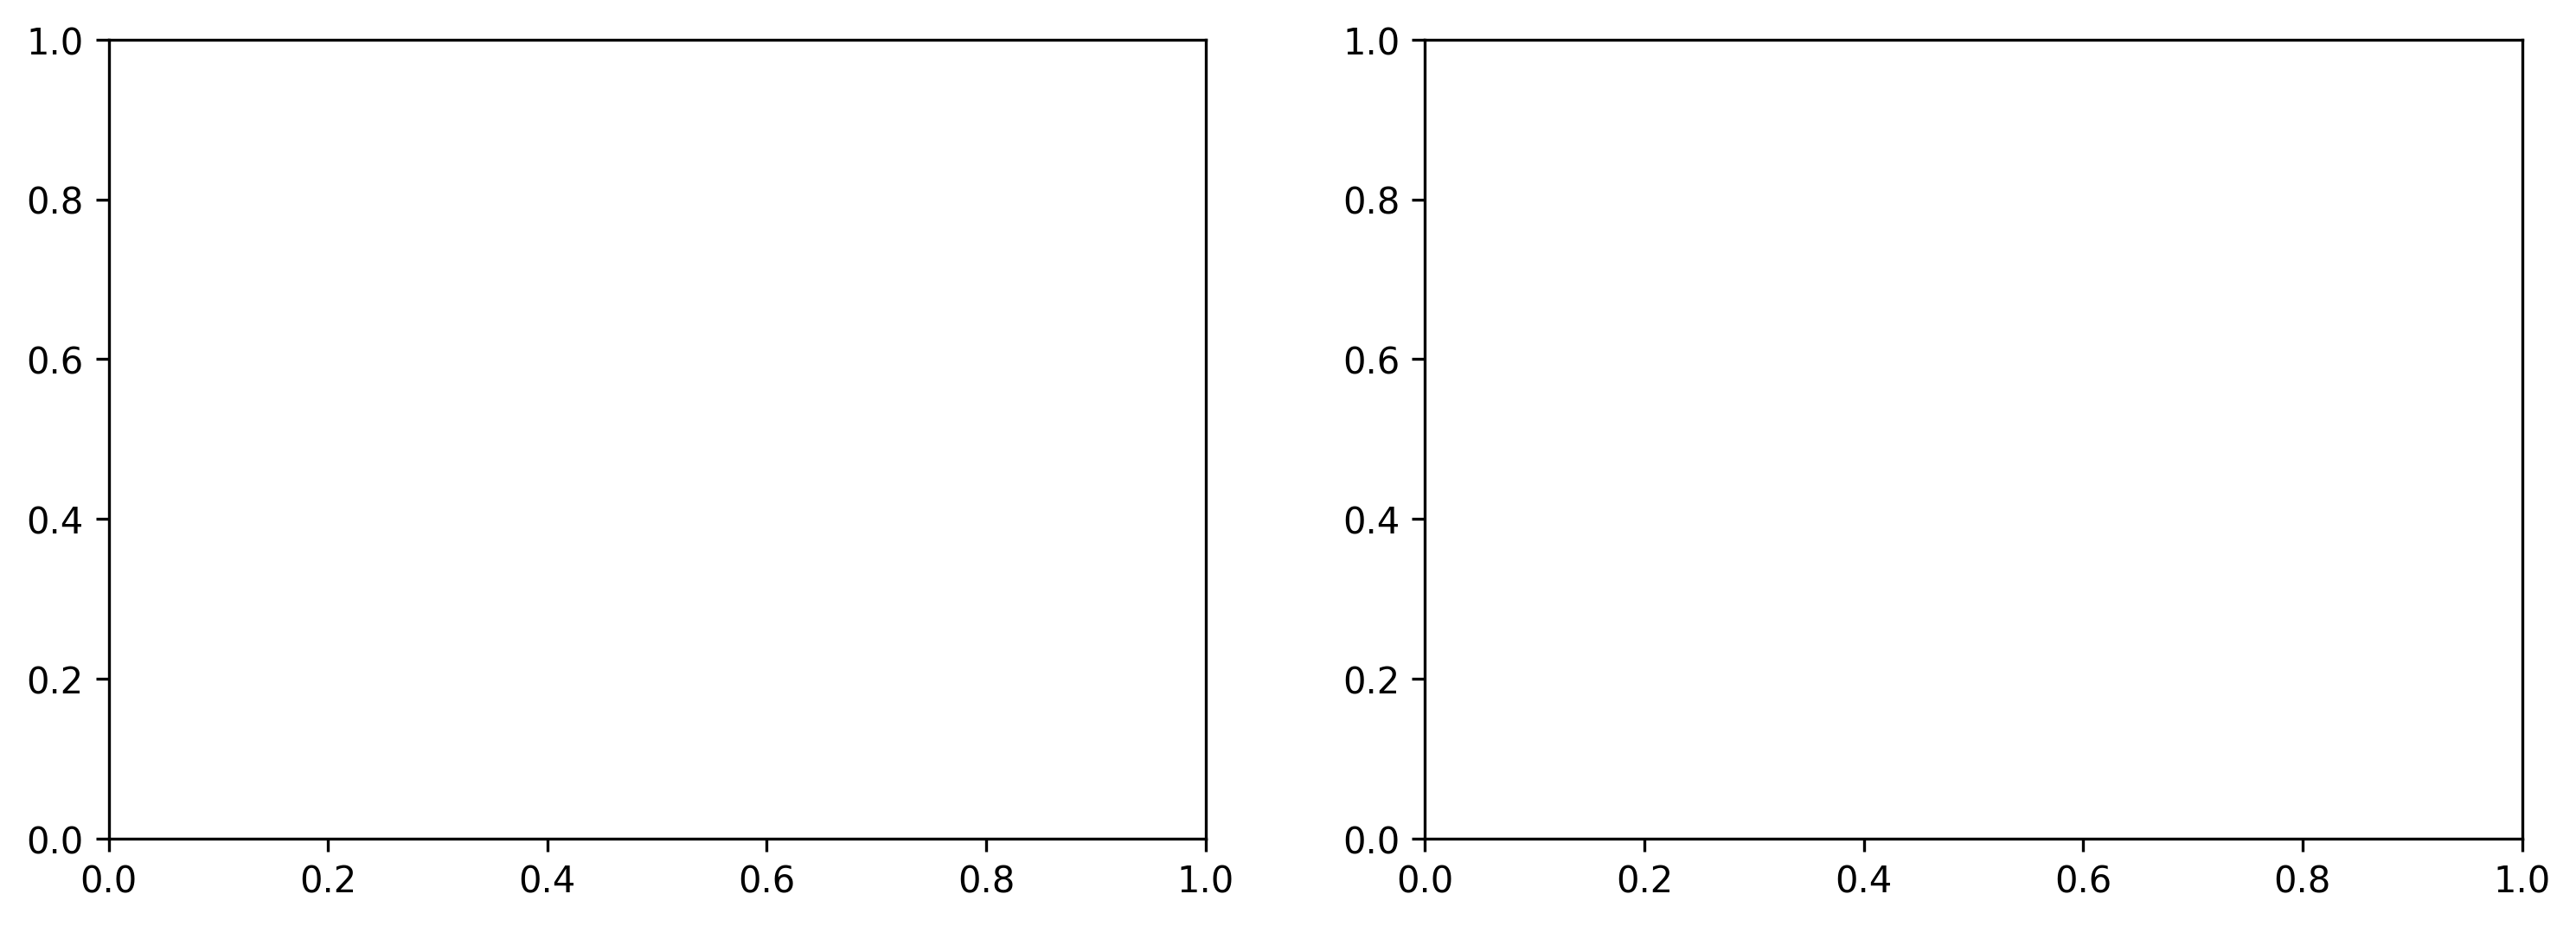

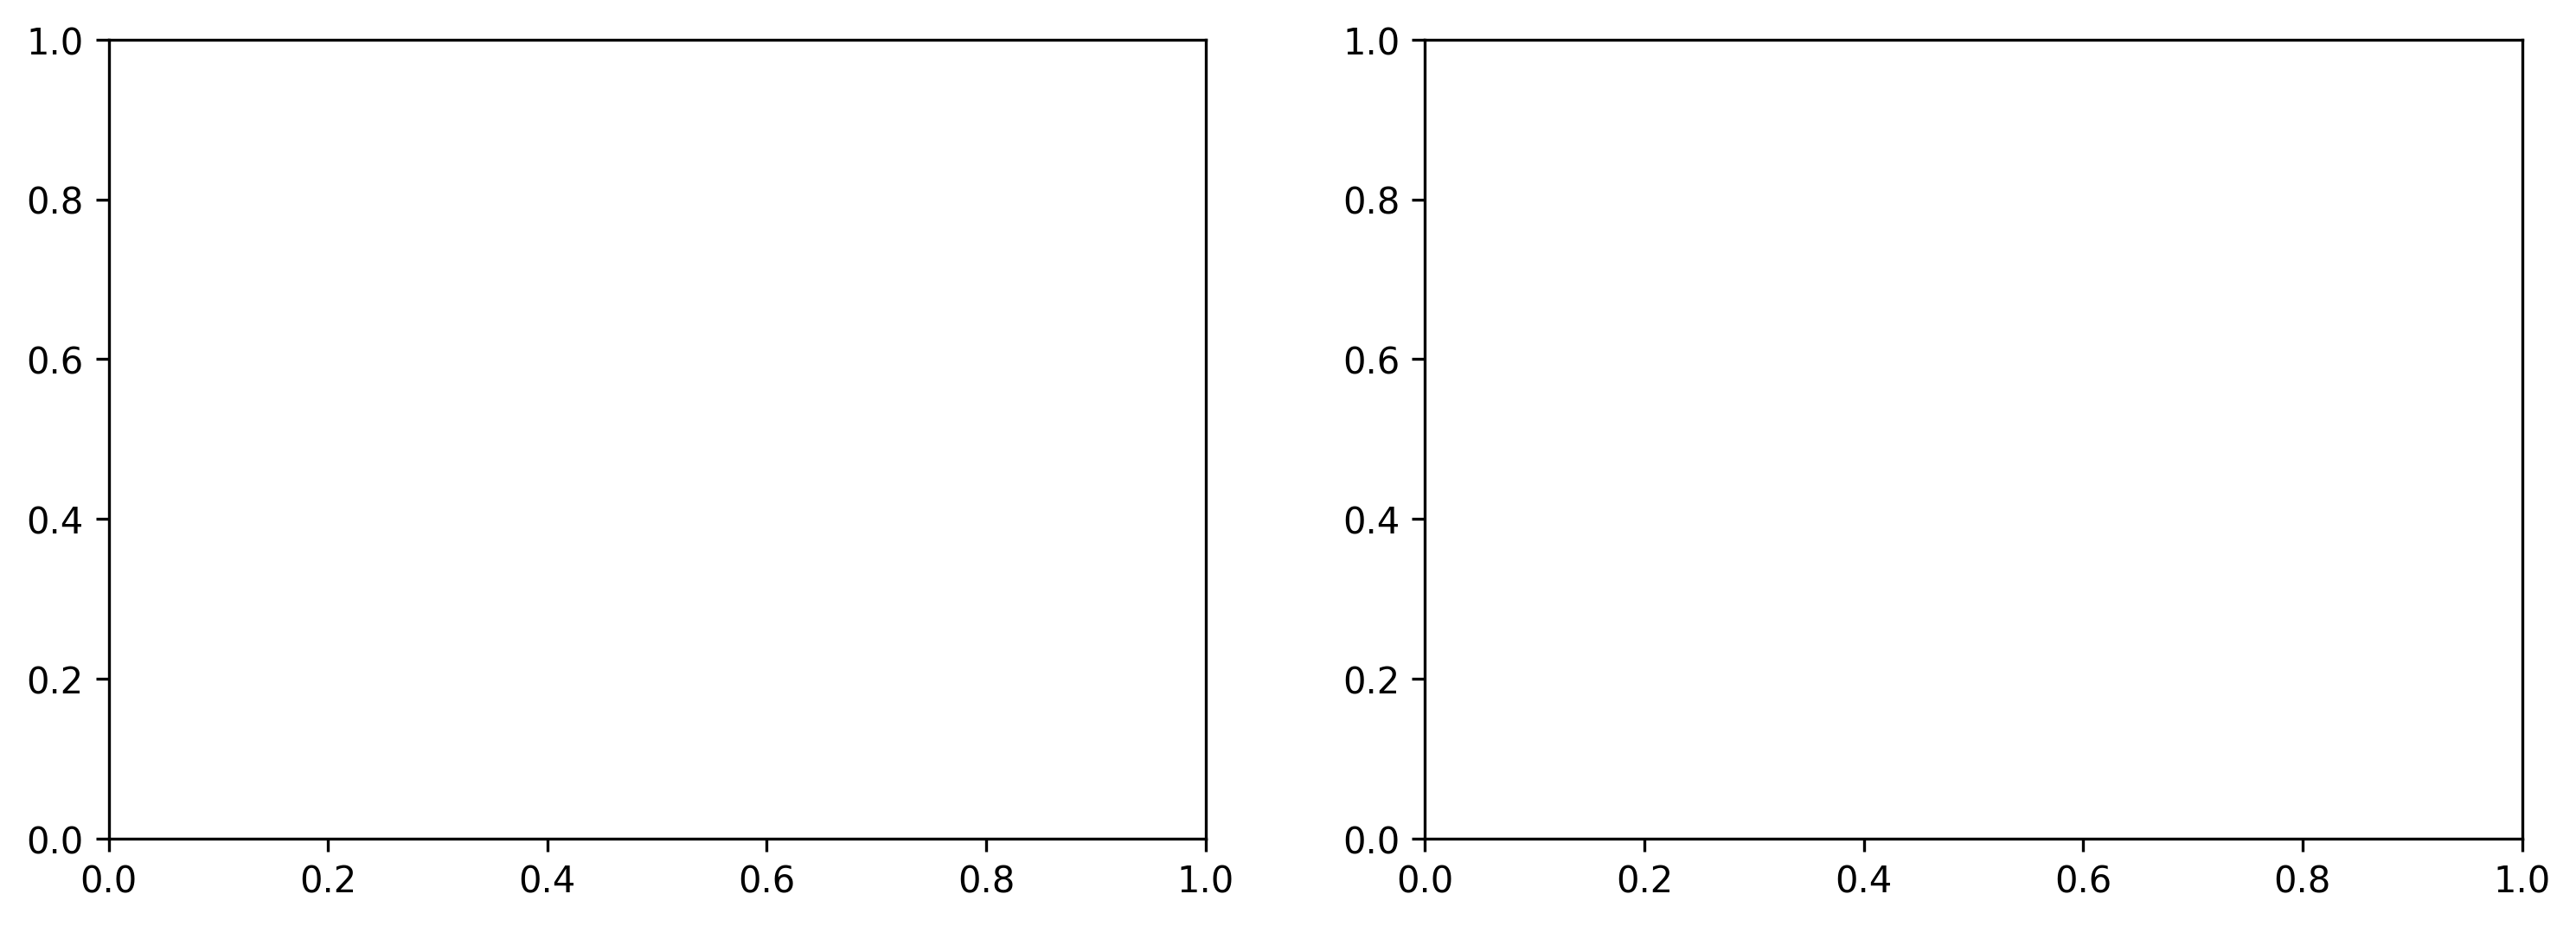

In [2]:
from rockpool.utilities.benchmarking import benchmark_neurons, plot_benchmark_results, all_lif_benchmarks
import warnings
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (12, 4)

for benchmark in all_lif_benchmarks:
    try:
        p_fn, c_fn, e_fn, bench_name = benchmark()
        print(f'Attempting to run benchmark {bench_name}...')

        results = benchmark_neurons(p_fn, c_fn, e_fn, bench_name)
        _, axes = plt.subplots(1, 2)
        plot_benchmark_results(*results, axes)

    except Exception as e:
        warnings.warn(f'Benchmark {bench_name} failed with error {str(e)}.')